# Import Statements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Mold 2

## Reading Datasets

### I will start using only the dataset with mold 2 descriptors, to get used to the process 

In [2]:
drugs = pd.read_csv("../../../../data/fda_approved_datasets/fda_approved_with_descriptors/fda_approved_mold2.csv", low_memory=False)
print(drugs.shape)
drugs.head()

(1895, 792)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,2.00000,3.493810,0.0,-1.457570
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,2.32193,0.523826,0.0,-0.816018
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,2.32193,1.814530,0.0,-1.453400
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,1.832480,0.0,-0.172449
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,-0.430677,0.0,-0.172449


## Separating explanatory and response variables

In [3]:
# I will create a dataset with only the features from mordred. This will make it
# easier to do the operations on the features

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
    "ROMol",
]

drugs_features = drugs.drop(labels=flag_columns, axis=1)

In [4]:
print(drugs_features.shape)
drugs_features.head()

(1895, 777)


,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.00000,3.493810,0.0,-1.457570
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.32193,0.523826,0.0,-0.816018
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.32193,1.814530,0.0,-1.453400
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,1.832480,0.0,-0.172449
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,-0.430677,0.0,-0.172449


In [5]:
response_variable = drugs[flag_columns].drop(columns=["ROMol"])
response_variable.head()

,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,False,False,True,True
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,False,True,False,False


In [6]:
explanatory_variables = drugs_features.copy()
explanatory_variables.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.00000,3.493810,0.0,-1.457570
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.32193,0.523826,0.0,-0.816018
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.32193,1.814530,0.0,-1.453400
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,1.832480,0.0,-0.172449
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,-0.430677,0.0,-0.172449


## Dealing With Object Columns

Checking how many non numeric values we have

In [7]:
def display_non_numeric_values(df):
    non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

    for column in non_numeric_columns:
        unique_values = df[column].unique()
        print(f"Column '{column}': {unique_values}")

In [8]:
display_non_numeric_values(explanatory_variables)

We have no nono numeric values to deal with

In [9]:
print(explanatory_variables.shape)
explanatory_variables.head()

(1895, 777)


,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.00000,3.493810,0.0,-1.457570
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.32193,0.523826,0.0,-0.816018
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.32193,1.814530,0.0,-1.453400
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,1.832480,0.0,-0.172449
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,-0.430677,0.0,-0.172449


## Dealing with Infinity Values

Let's check if the dataset has infinity values.

In [10]:
# Count the number of infinity values in the dataset
num_infinity = np.sum(np.isinf(explanatory_variables))

print(f"Number of Infinity Values (np.inf): {num_infinity.sum()}")

Number of Infinity Values (np.inf): 0


## Scaling of variables

Scaling is necessary so every variable is on the same scale and are comparable to each other. Non-parametric imputation as kNN are very sensible to the scale of the variables, so this is mandatory step.

In [11]:
# scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(explanatory_variables)

# Merging the column name with the scale data array
explanatory_variables_scaled = pd.DataFrame(scaled_data, columns=explanatory_variables.columns)
print(explanatory_variables_scaled.shape)
explanatory_variables_scaled.head()

(1895, 777)


,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,...,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992
1,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,...,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992
2,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,...,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992
3,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,...,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992
4,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,...,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992


## Zero Variance Filter

Below is a function that removes variance using a threshold. Because the data is scaled, the variance present is only either 1 or 0. Therefore, this function will only remove features with variance equals to zero.

In [12]:
def variance_threshold_selector(data, threshold=0.0):
    """
    Recieves a SCALED dataframe and returns the non-zero variance dataframe
    data: scaled dataframe
    threshold: minimum variance
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [13]:
# Zero variance filter over scaled data
explanatory_variables_no_low_var = variance_threshold_selector(explanatory_variables_scaled)
print(explanatory_variables_no_low_var.shape)
explanatory_variables_no_low_var.head()

(1895, 777)


,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,...,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992
1,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,...,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992
2,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,...,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992
3,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,...,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992
4,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,...,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992,-0.045992


## Checking NaN Values

There are 0 rows with at least one NaN value.


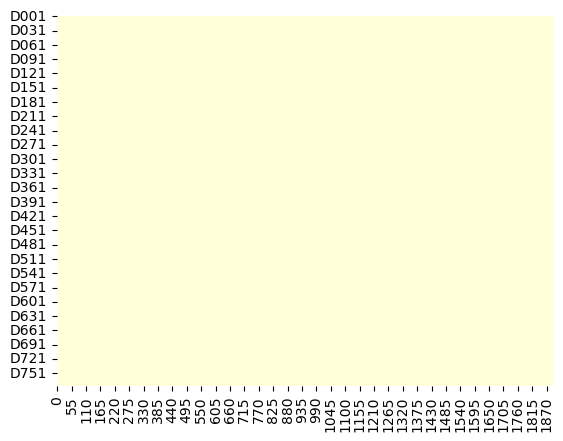

In [14]:
explanatory_variables_no_low_var[explanatory_variables_no_low_var.isnull().any(axis=1)]
print(f'There are {explanatory_variables_no_low_var[explanatory_variables_no_low_var.isnull().any(axis=1)].shape[0]} rows with at least one NaN value.')
g = sns.heatmap(explanatory_variables_no_low_var.isna().transpose(), cmap="YlGnBu", cbar=False)

## Descale Data

Now, we need to restore the data to the way it way before scaling. We do this fo rtwo reasons:

1. Some models need to be calculated on scaled data, some can't be.

2. For the models that need to use scaled data, the scaling process needs to be done separatly for the training and the testing datasets.

For descaling, it's essential to utilize the identical scaler object employed for the initial data scaling. However, the scaler object was originally fitted to the complete dataset, and along the notebook, several columns from that dataset were removed. We'll craft a provisional dataset that retains the original data but only has the selected columns. This new dataset will be scaled using a new scaler object, enabling us to accurately descale the data.


In [16]:
# creating temporary dataset
drugs_scaler = explanatory_variables[explanatory_variables_no_low_var.columns].copy()
drugs_scaler.shape

(1895, 777)

In [17]:
# fitting the scaler object to the temporary dataset
descaler = StandardScaler()
_ = descaler.fit_transform(drugs_scaler)

In [18]:
# descaling
explanatory_variables_descaled = descaler.inverse_transform(explanatory_variables_no_low_var)
explanatory_variables_descaled = pd.DataFrame(explanatory_variables_descaled, columns=explanatory_variables_no_low_var.columns)

print(explanatory_variables_descaled.shape)
explanatory_variables_descaled.head()

(1895, 777)


,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here we can compare a few columns of the dataset before the feature selection, and after descaling

In [21]:
explanatory_variables_descaled[["D001", "D009", "D666", "D769"]]

,D001,D009,D666,D769
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...
1890,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1891,3.402820e+38,3.402820e+38,3.402820e+38,3.402820e+38
1892,3.402820e+38,3.402820e+38,3.402820e+38,3.402820e+38
1893,3.402820e+38,3.402820e+38,3.402820e+38,3.402820e+38


In [22]:
drugs[["D001", "D009", "D666", "D769"]]

,D001,D009,D666,D769
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...
1890,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1891,3.402820e+38,3.402820e+38,3.402820e+38,3.402820e+38
1892,3.402820e+38,3.402820e+38,3.402820e+38,3.402820e+38
1893,3.402820e+38,3.402820e+38,3.402820e+38,3.402820e+38


## Re-join response and explanatory variables

In [23]:
drugs_processed = pd.concat([response_variable, explanatory_variables_descaled], axis=1)

In [24]:
print(drugs_processed.shape)
drugs_processed.head()

(1895, 791)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Save Dataset

In [25]:
drugs_processed.to_csv("../data/fda_approved/fda_mold2_pre_processed_descriptors.csv", index=False)